### 如何找到近邻？

在基于近邻的协同过滤中，能够识别个体的邻近项很重要。我们来看一个小数据集，学习如何使用不同的指标识别这些邻近项。

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import project_tests as t
import project_helper as h
%matplotlib inline

play_data = pd.DataFrame({'x1': [-3, -2, -1, 0, 1, 2, 3], 
               'x2': [9, 4, 1, 0, 1, 4, 9],
               'x3': [1, 2, 3, 4, 5, 6, 7],
               'x4': [2, 5, 15, 27, 28, 30, 31]
})

#create play data dataframe
play_data = play_data[['x1', 'x2', 'x3', 'x4']]

### 衡量相似性

我们将学习的第一组指标具有相似的特征：

1.皮尔逊相关系数
2.斯皮尔曼相关系数
3.Kendall's Tau 相关系数

我们深入了解下每个指标。

### 皮尔逊相关系数

首先，**皮尔逊相关系数**衡量的是**线性关系**的强度和方向。  

假设有两个向量 x 和 y，我们可以按照以下方式比较它们的每个元素，从而计算皮尔逊相关系数：


$$CORR(\textbf{x}, \textbf{y}) = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum\limits_{i=1}^{n}(y_i-\bar{y})^2}} $$

其中 

$$\bar{x} = \frac{1}{n}\sum\limits_{i=1}^{n}x_i$$

1.编写一个函数，它将接受两个向量，并返回皮尔逊相关系数。然后，你可以在以下单元格中使用断言语句，将你的答案与 NumPy 的内置函数进行比较。

In [2]:
def pearson_corr(x, y):
    '''
    INPUT
    x - an array of matching length to array y
    y - an array of matching length to array x
    OUTPUT
    corr - the pearson correlation coefficient for comparing x and y
    '''
    # Compute Mean Values
    mean_x, mean_y = np.sum(x)/len(x), np.sum(y)/len(y) 
    
    x_diffs = x - mean_x
    y_diffs = y - mean_y
    numerator = np.sum(x_diffs*y_diffs)
    denominator = np.sqrt(np.sum(x_diffs**2))*np.sqrt(np.sum(y_diffs**2))
        
    corr = numerator/denominator
                            
    return corr                    

In [3]:
# This cell will test your function against the built in numpy function
assert pearson_corr(play_data['x1'], play_data['x2']) == np.corrcoef(play_data['x1'], play_data['x2'])[0][1], 'Oops!  The correlation between the first two columns should be 0, but your function returned {}.'.format(pearson_corr(play_data['x1'], play_data['x2']))
assert round(pearson_corr(play_data['x1'], play_data['x3']), 2) == np.corrcoef(play_data['x1'], play_data['x3'])[0][1], 'Oops!  The correlation between the first and third columns should be {}, but your function returned {}.'.format(np.corrcoef(play_data['x1'], play_data['x3'])[0][1], pearson_corr(play_data['x1'], play_data['x3']))
assert round(pearson_corr(play_data['x3'], play_data['x4']), 2) == round(np.corrcoef(play_data['x3'], play_data['x4'])[0][1], 2), 'Oops!  The correlation between the first and third columns should be {}, but your function returned {}.'.format(np.corrcoef(play_data['x3'], play_data['x4'])[0][1], pearson_corr(play_data['x3'], play_data['x4']))
print("If this is all you see, it looks like you are all set!  Nice job coding up Pearson's correlation coefficient!")
# 这里是用np.coorcoef和自己写的函数做对比

If this is all you see, it looks like you are all set!  Nice job coding up Pearson's correlation coefficient!


`2.` 计算了**皮尔逊相关系数**后，请使用以下字典判断关于**这种**衡量指标的哪些语句表述正确。

In [4]:
a = True
b = False
c = "We can't be sure."


pearson_dct = {"If when x increases, y always increases, Pearson's correlation will be always be 1.": b,
               "If when x increases by 1, y always increases by 3, Pearson's correlation will always be 1.": a,
               "If when x increases by 1, y always decreases by 5, Pearson's correlation will always be -1.":a,
               "If when x increases by 1, y increases by 3 times x, Pearson's correlation will always be 1.": b
}

t.sim_2_sol(pearson_dct)

That's right!  Pearson's correlation relates to a linear relationship.  The second and third cases are examples of perfect linear relationships, where we would receive values of 1 and -1.  Only having an increase or decrease that are directly related will not lead to a Pearson's correlation coefficient of 1 or -1.  You can see this by testing out your function using the examples above without using assert statements.


### 斯皮尔曼相关系数

下面我们来看看**斯皮尔曼相关系数**。斯皮尔曼相关系数称之为[非参数](https://en.wikipedia.org/wiki/Nonparametric_statistics)统计量，它的分布不取决于参数。（遵守正态分布或二项分布的统计量属于参数统计量。）  

通常，非参数统计量基于数据的排名，而不是原始值。斯皮尔曼相关系数就属于这种情况，它的计算方式与皮尔逊相关系数的差不多。但是，我们将使用每个值的排名值，而不是原始值。

我们可以使用 **.rank()** 方法快速从原始值更改成排名值，如下所示：

In [5]:
print("The ranked values for the variable x1 are: {}".format(np.array(play_data['x1'].rank())))
print("The raw data values for the variable x1 are: {}".format(np.array(play_data['x1'])))

The ranked values for the variable x1 are: [1. 2. 3. 4. 5. 6. 7.]
The raw data values for the variable x1 are: [-3 -2 -1  0  1  2  3]


如果我们将每个数据映射到排名数据值，如上所示：

$$\textbf{x} \rightarrow \textbf{x}^{r}$$
$$\textbf{y} \rightarrow \textbf{y}^{r}$$

其中，**r** 表示它们是排名值（并不是 r 次幂）。斯皮尔曼相关系数的计算公式为：

$$SCORR(\textbf{x}, \textbf{y}) = \frac{\sum\limits_{i=1}^{n}(x^{r}_i - \bar{x}^{r})(y^{r}_i - \bar{y}^{r})}{\sqrt{\sum\limits_{i=1}^{n}(x^{r}_i-\bar{x}^{r})^2}\sqrt{\sum\limits_{i=1}^{n}(y^{r}_i-\bar{y}^{r})^2}} $$

其中 

$$\bar{x}^r = \frac{1}{n}\sum\limits_{i=1}^{n}x^r_i$$

`3.` 编写一个函数，它将接受两个向量，并返回斯皮尔曼相关系数。然后，你可以在以下单元格中使用断言语句，将你的答案与 scipy 统计语言的内置函数进行比较。

In [6]:
def corr_spearman(x, y):
    '''
    INPUT
    x - an array of matching length to array y
    y - an array of matching length to array x
    OUTPUT
    corr - the spearman correlation coefficient for comparing x and y
    '''
    # Change each vector to ranked values
    x = x.rank()
    y = y.rank()
    
    # Compute Mean Values
    mean_x, mean_y = np.sum(x)/len(x), np.sum(y)/len(y) 
    
    x_diffs = x - mean_x
    y_diffs = y - mean_y
    numerator = np.sum(x_diffs*y_diffs)
    denominator = np.sqrt(np.sum(x_diffs**2))*np.sqrt(np.sum(y_diffs**2))
        
    corr = numerator/denominator
                            
    return corr  

In [7]:
# This cell will test your function against the built in scipy function
assert corr_spearman(play_data['x1'], play_data['x2']) == spearmanr(play_data['x1'], play_data['x2'])[0], 'Oops!  The correlation between the first two columns should be 0, but your function returned {}.'.format(compute_corr(play_data['x1'], play_data['x2']))
assert round(corr_spearman(play_data['x1'], play_data['x3']), 2) == spearmanr(play_data['x1'], play_data['x3'])[0], 'Oops!  The correlation between the first and third columns should be {}, but your function returned {}.'.format(np.corrcoef(play_data['x1'], play_data['x3'])[0][1], compute_corr(play_data['x1'], play_data['x3']))
assert round(corr_spearman(play_data['x3'], play_data['x4']), 2) == round(spearmanr(play_data['x3'], play_data['x4'])[0], 2), 'Oops!  The correlation between the first and third columns should be {}, but your function returned {}.'.format(np.corrcoef(play_data['x3'], play_data['x4'])[0][1], compute_corr(play_data['x3'], play_data['x4']))
print("If this is all you see, it looks like you are all set!  Nice job coding up Spearman's correlation coefficient!")


If this is all you see, it looks like you are all set!  Nice job coding up Spearman's correlation coefficient!


`4.` 计算了**斯皮尔曼相关系数**后，请使用以下字典判断关于**这种**衡量指标的哪些语句表述正确。

In [8]:
a = True
b = False
c = "We can't be sure."


spearman_dct = {"If when x increases, y always increases, Spearman's correlation will be always be 1.": a,
               "If when x increases by 1, y always increases by 3, Pearson's correlation will always be 1.": a,
               "If when x increases by 1, y always decreases by 5, Pearson's correlation will always be -1.": a,
               "If when x increases by 1, y increases by 3 times x, Pearson's correlation will always be 1.": a
}

t.sim_4_sol(spearman_dct)

That's right!  Unlike Pearson's correlation, Spearman's correlation can have perfect relationships (1 or -1 values) that aren't linear relationships.  You will notice that neither Spearman or Pearson correlation values suggest a relation when there are quadratic relationships.


### Kendall's Tau 相关系数

Kendall's tau 相关系数与斯皮尔曼相关系数很相似。这两种衡量方法都是非参数关系衡量方法。具体而言，斯皮尔曼相关系数和 Kendall's tau 相关系数都基于排名数据，而不是原始数据。  

与前面的两种衡量方法相似，Kendall's Tau 的值始终位于 -1-1 之间，其中 -1 表示两个变量之间有很强的负相关关系，1 表示两个变量之间有很强的正相关关系。

虽然斯皮尔曼相关系数与 Kendall's Tau 很相似，但是 Kendall's Tau 在统计学上的优势更大，因为在使用更大的样本量时，Kendall's Tau 的变化性更小。不过，斯皮尔曼衡量方法计算效率更高，因为 Kendall's Tau 为 $O(n^2)$，而斯皮尔曼相关系数为 $O(nLog(n))$。你可以在[此话题](https://www.researchgate.net/post/Does_Spearmans_rho_have_any_advantage_over_Kendalls_tau)下了解更多信息。

我们来看看如何计算该系数。同样，需要将数据映射到排名值：

$$\textbf{x} \rightarrow \textbf{x}^{r}$$
$$\textbf{y} \rightarrow \textbf{y}^{r}$$

然后按照以下公式计算 Kendall's Tau 系数：

$$TAU(\textbf{x}, \textbf{y}) = \frac{2}{n(n -1)}\sum_{i < j}sgn(x^r_i - x^r_j)sgn(y^r_i - y^r_j)$$

其中 $sgn$ 会获取排名值之差的符号。以下部分 

$$sgn(x^r_i - x^r_j)$$ 

还可以改写成：

$$
 \begin{cases} 
      -1  & x^r_i < x^r_j \\
      0 & x^r_i = x^r_j \\
      1 & x^r_i > x^r_j 
   \end{cases}
$$

所以以下部分的可能值 

$$sgn(x^r_i - x^r_j)sgn(y^r_i - y^r_j)$$

只能是 1、-1 或 0，可以告诉我们 **x** 和 **y** 的排名值朝着右侧方向的次数所占的比例。

`5.` 编写一个函数，它将接受两个向量，并返回斯皮尔曼相关系数。然后，你可以在以下单元格中使用断言语句，将你的答案与 scipy 统计语言的内置函数进行比较。

In [9]:
def kendalls_tau(x, y):
    '''
    INPUT
    x - an array of matching length to array y
    y - an array of matching length to array x
    OUTPUT
    tau - the kendall's tau for comparing x and y
    '''    
    # Change each vector to ranked values
    x = x.rank()
    y = y.rank()
    n = len(x)
     
    sum_vals = 0
    # Compute Mean Values
    for i, (x_i, y_i) in enumerate(zip(x, y)):
        for j, (x_j, y_j) in enumerate(zip(x, y)):
            if i < j:
                sum_vals += np.sign(x_i - x_j)*np.sign(y_i - y_j)
                        
    tau = 2*sum_vals/(n*(n-1))
    
    return tau

In [10]:
# This cell will test your function against the built in scipy function
assert kendalls_tau(play_data['x1'], play_data['x2']) == kendalltau(play_data['x1'], play_data['x2'])[0], 'Oops!  The correlation between the first two columns should be 0, but your function returned {}.'.format(kendalls_tau(play_data['x1'], play_data['x2']))
assert round(kendalls_tau(play_data['x1'], play_data['x3']), 2) == kendalltau(play_data['x1'], play_data['x3'])[0], 'Oops!  The correlation between the first and third columns should be {}, but your function returned {}.'.format(kendalltau(play_data['x1'], play_data['x3'])[0][1], kendalls_tau(play_data['x1'], play_data['x3']))
assert round(kendalls_tau(play_data['x3'], play_data['x4']), 2) == round(kendalltau(play_data['x3'], play_data['x4'])[0], 2), 'Oops!  The correlation between the first and third columns should be {}, but your function returned {}.'.format(kendalltau(play_data['x3'], play_data['x4'])[0][1], kendalls_tau(play_data['x3'], play_data['x4']))
print("If this is all you see, it looks like you are all set!  Nice job coding up Kendall's Tau!")


If this is all you see, it looks like you are all set!  Nice job coding up Kendall's Tau!


`6.` 请根据你的函数（和/或对上述每个系数的理解）准确判断以下每个语句是否正确。**注意：**数据存储方式可能会导致四舍五入的结果不一样，所以建议比较小数位不超过 4 位的数值。

In [11]:
a = True
b = False
c = "We can't be sure."


corr_comp_dct = {"For all columns of play_data, Spearman and Kendall's measures match.": a,
                "For all columns of play_data, Spearman and Pearson's measures match.": b, 
                "For all columns of play_data, Pearson and Kendall's measures match.": b}

t.sim_6_sol(corr_comp_dct)

That's right!  Pearson does not match the other two measures, as it looks specifically for linear relationships.  However, Spearman and Kenall's measures are exactly the same to one another in the cases related to play_data.


### 衡量距离

所有上述方法都是相关性衡量方法。同样，还有一些距离衡量方法（其实有很多）。[这篇文章](http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/)很精彩，介绍了一些热门的距离指标。在此 notebook 中，我们将学习两种衡量方法。  

1.欧几里得距离
2.曼哈坦距离

与刚刚为它们创建函数的三种衡量方法不同，这两种衡量方法的值范围是 0 到无穷大。值接近 0 表示两个向量更相似。值越大，两个向量之间越不相似。

我们通常会出于个人喜好、听众以及数据特性选择这两种 `distance` 指标或上述三个 `similarity` 指标。稍后你将了解一种情形，其中欧几里得距离或曼哈坦距离比皮尔逊相关系数更合适。

### 欧几里得距离

欧几里得距离还可以看做两个向量之间的直线距离。

对于两个向量 **x** 和 **y**，计算公式如下所示：

$$ EUC(\textbf{x}, \textbf{y}) = \sqrt{\sum\limits_{i=1}^{n}(x_i - y_i)^2}$$

### 曼哈坦距离

与欧几里得距离不同，曼哈坦距离表示一个向量与另一个之间的“曼哈顿街区”距离。所以，计算的是两个点之间的距离，但是不能穿过建筑。

该距离的计算公式为：

$$ MANHATTAN(\textbf{x}, \textbf{y}) = \sqrt{\sum\limits_{i=1}^{n}|x_i - y_i|}$$

请使用上述每个公式为每个衡量方法编写一个函数，该函数将接受两个向量，并返回欧几里得距离和曼哈坦距离。

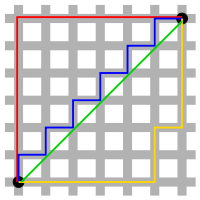

从上图中可以看到，**蓝色**线条表示两点之间的**曼哈坦**距离，而**绿色**线条表示两点之间的**欧几里得**距离**。

`7.` 请在以下单元格中完成每个距离指标的函数。然后在以下单元格中对照内置值测试你的函数。

In [12]:
def eucl_dist(x, y):
    '''
    INPUT
    x - an array of matching length to array y
    y - an array of matching length to array x
    OUTPUT
    euc - the euclidean distance between x and y
    '''  
    return np.linalg.norm(x - y)
    
def manhat_dist(x, y):
    '''
    INPUT
    x - an array of matching length to array y
    y - an array of matching length to array x
    OUTPUT
    manhat - the manhattan distance between x and y
    '''  
    return sum(abs(e - s) for s, e in zip(x, y))

In [13]:
# Test your functions
assert h.test_eucl(play_data['x1'], play_data['x2']) == eucl_dist(play_data['x1'], play_data['x2'])
assert h.test_eucl(play_data['x2'], play_data['x3']) == eucl_dist(play_data['x2'], play_data['x3'])
assert h.test_manhat(play_data['x1'], play_data['x2']) == manhat_dist(play_data['x1'], play_data['x2'])
assert h.test_manhat(play_data['x2'], play_data['x3']) == manhat_dist(play_data['x2'], play_data['x3'])


### 最后注意事项

需要注意的是，在使用本 notebook 上方介绍的三个指标衡量时，两个向量可能比较相似，但是使用后面的两个指标衡量后，二者却差别很大。重申一遍，我们需要根据具体情形判断所选的指标是否合适。

```python

```